In [1]:
import tensorflow as tf 
import matplotlib
import matplotlib.pyplot as plt
from datetime import datetime 
from tensorflow.keras import utils 



### Importazione DataSet

In [2]:
(train_images, train_labels), (test_images, test_labels) = tf.keras.datasets.mnist.load_data(path="mnist.npz")

print(train_images.shape)
print(train_labels.shape)
print()
print(test_images.shape)
print(test_labels.shape)

(60000, 28, 28)
(60000,)

(10000, 28, 28)
(10000,)


### Visualizzazione di un elemento del dataset

In [3]:
print(train_images[1])
print()
print(train_labels[1])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0  51 159 253
  159  50   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0  48 238 252 252
  252 237   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0  54 227 253 252 239
  233 252  57   6   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0  10  60 224 252 253 252 202
   84 252 253 122   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0 163 252 252 252 25

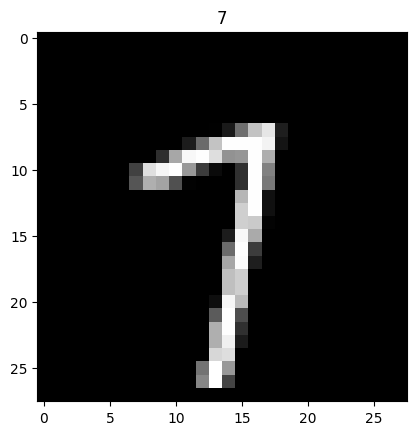

In [4]:
plt.title(train_labels[42])
plt.imshow(train_images[42], cmap="gray")
plt.show()

### Normalizzazione delle immagini di train e di test ((x.max - x) / (x.min - x))

In [5]:
train_images = ((train_images - 0) / (255 - 0))
test_images = (test_images / 255)

train_images = train_images.reshape((-1, 784))
test_images = test_images.reshape((-1, 784))

print(train_images.shape) # (60000, 784)
print(test_images.shape)  # (10000, 784)

(60000, 784)
(10000, 784)


### Codifica etichette con one-hot

In [6]:
print(train_labels[42])

train_labels = tf.keras.utils.to_categorical(train_labels)
test_labels = tf.keras.utils.to_categorical(test_labels)

print(train_labels[42])


7
[0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]


### Creazione modello Sequenziale

In [7]:
model_seq = tf.keras.models.Sequential()

model_seq.add(tf.keras.layers.Dense(32, activation='sigmoid', input_shape = (784,)))
model_seq.add(tf.keras.layers.Dense(32, activation = 'sigmoid'))
model_seq.add(tf.keras.layers.Dense(10, activation = 'softmax'))



model_seq.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'categorical_crossentropy',
    metrics =['accuracy']
)
model_seq.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 32)                25120     
                                                                 
 dense_1 (Dense)             (None, 32)                1056      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 26506 (103.54 KB)
Trainable params: 26506 (103.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Creazione modello Funzionale

In [8]:
inputs = tf.keras.layers.Input(shape=(784,))
dense_1 = tf.keras.layers.Dense(32, activation='sigmoid')(inputs)
dense_2 = tf.keras.layers.Dense(32, activation='sigmoid')(dense_1)
outputs = tf.keras.layers.Dense(10, activation= 'softmax')(dense_2)

model_func = tf.keras.models.Model(
    inputs=inputs,
    outputs=outputs
)

model_func.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss='categorical_crossentropy',
  metrics=['accuracy'],
)

model_func.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 784)]             0         
                                                                 
 dense_3 (Dense)             (None, 32)                25120     
                                                                 
 dense_4 (Dense)             (None, 32)                1056      
                                                                 
 dense_5 (Dense)             (None, 10)                330       
                                                                 
Total params: 26506 (103.54 KB)
Trainable params: 26506 (103.54 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


### Addestramento di entrambi i modelli (Sequenziale e Funzionale)

In [9]:
time_start = datetime.now()
history_seq = model_seq.fit(
    x = train_images,
    y = train_labels,
    epochs = 10,
    validation_data = (test_images, test_labels),
    verbose = 2

)
time_sequential = datetime.now() - time_start

print('\n')

time_start = datetime.now()
history_func = model_func.fit(
    x = train_images,
    y = train_labels,
    epochs = 10,
    validation_data = (test_images, test_labels),
    verbose = 2

)

time_functional = datetime.now() - time_start

Epoch 1/10
1875/1875 - 4s - loss: 0.7673 - accuracy: 0.8209 - val_loss: 0.3252 - val_accuracy: 0.9140 - 4s/epoch - 2ms/step
Epoch 2/10
1875/1875 - 4s - loss: 0.2732 - accuracy: 0.9238 - val_loss: 0.2252 - val_accuracy: 0.9338 - 4s/epoch - 2ms/step
Epoch 3/10
1875/1875 - 4s - loss: 0.2037 - accuracy: 0.9416 - val_loss: 0.1838 - val_accuracy: 0.9469 - 4s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 4s - loss: 0.1684 - accuracy: 0.9508 - val_loss: 0.1597 - val_accuracy: 0.9548 - 4s/epoch - 2ms/step
Epoch 5/10
1875/1875 - 4s - loss: 0.1454 - accuracy: 0.9572 - val_loss: 0.1496 - val_accuracy: 0.9576 - 4s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 4s - loss: 0.1285 - accuracy: 0.9618 - val_loss: 0.1377 - val_accuracy: 0.9592 - 4s/epoch - 2ms/step
Epoch 7/10
1875/1875 - 4s - loss: 0.1161 - accuracy: 0.9659 - val_loss: 0.1326 - val_accuracy: 0.9619 - 4s/epoch - 2ms/step
Epoch 8/10
1875/1875 - 4s - loss: 0.1064 - accuracy: 0.9685 - val_loss: 0.1271 - val_accuracy: 0.9623 - 4s/epoch - 2ms/step
Epoch 9/

### Come possiamo notare con la stessa identica rete entrambi i modelli danno i stessi risultati

In [10]:
print('\t Sequential\t Functional')
print('Layers\t', len(model_seq.layers), '\t\t', len(model_func.layers))
print('Params\t', model_seq.count_params(), '\t\t', model_func.count_params())
print('Time\t', time_sequential.seconds, '\t\t', time_functional.seconds)
print('Acc\t', int(history_seq.history['val_accuracy'][-1] * 10000) / 100, '\t\t', int(history_func.history['val_accuracy'][-1] * 10000) / 100)
print('Loss\t', str(history_seq.history['val_loss'][-1])[:5], '\t\t', str(history_func.history['val_loss'][-1])[:5])

	 Sequential	 Functional
Layers	 3 		 4
Params	 26506 		 26506
Time	 36 		 32
Acc	 96.39 		 96.36
Loss	 0.118 		 0.116


### Illustrazione grafica a confronto i risultati di addestramento dei modelli ( Loss, Val Loss, Accuracy e Val Accuracy)

In [13]:
plt.rcParams['figure.figsize'] = [10, 10]
matplotlib.rcParams['figure.dpi'] = 300

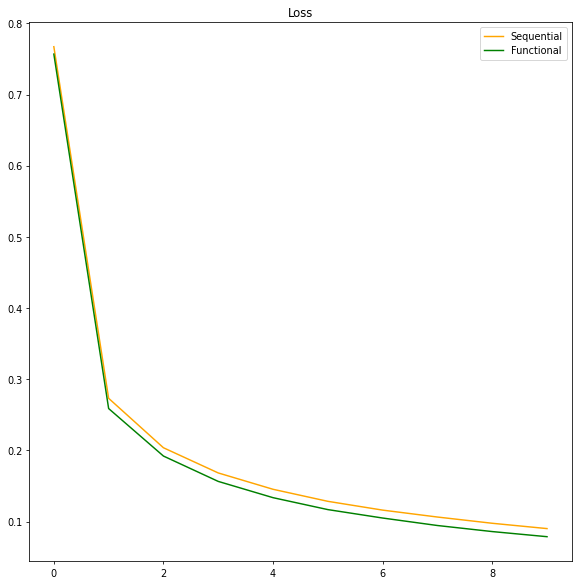

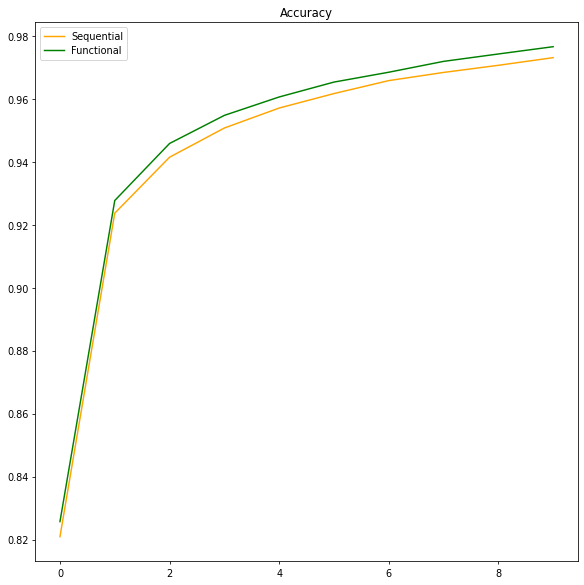

In [15]:


plt.rcParams['figure.figsize'] = [10,10]
matplotlib.rcParams['figure.dpi'] = 70

plt.plot(history_seq.history['loss'], color='orange', label='Sequential')
plt.plot(history_func.history['loss'], color='green', label='Functional')
plt.title('Loss')
plt.legend()
plt.show()

plt.plot(history_seq.history['accuracy'], color='orange', label='Sequential')
plt.plot(history_func.history['accuracy'], color='green', label='Functional')
plt.title('Accuracy')
plt.legend()
plt.show()

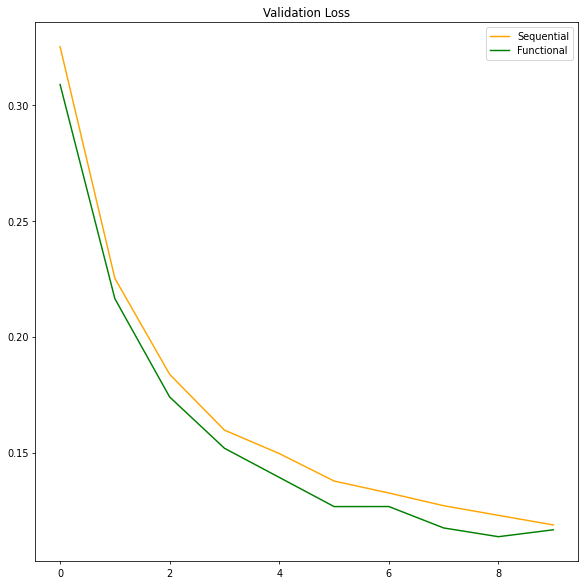

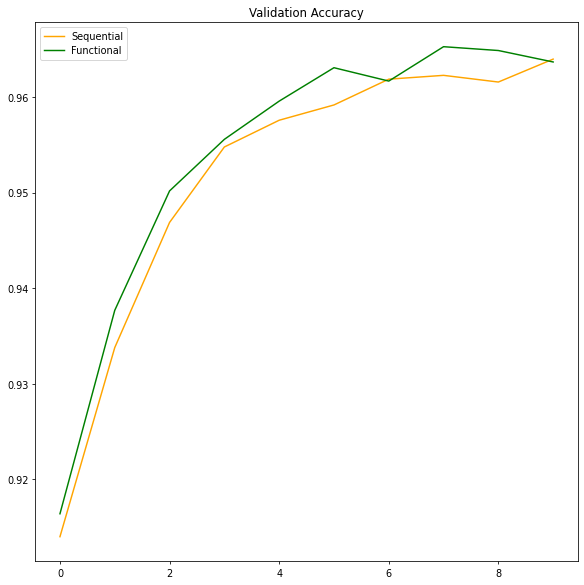

In [14]:
plt.rcParams['figure.figsize'] = [10, 10]
matplotlib.rcParams['figure.dpi'] = 70

plt.plot(history_seq.history['val_loss'], color='orange', label='Sequential')
plt.plot(history_func.history['val_loss'], color='green', label='Functional')
plt.title('Validation Loss')
plt.legend()
plt.show()


plt.plot(history_seq.history['val_accuracy'], color='orange', label='Sequential')
plt.plot(history_func.history['val_accuracy'], color='green', label='Functional')
plt.title('Validation Accuracy')
plt.legend()
plt.show()

### Con il modello funzionale ( Functional API) abbiamo una maggiore gestione della rete e possiamo effettuare delle concatenazione di layers 

In [19]:
inputs = tf.keras.layers.Input(shape=(784,))
dense = tf.keras.layers.Dense(16, activation='sigmoid')(inputs)
dense_1 = tf.keras.layers.Dense(16, activation='sigmoid')(inputs)
merged = tf.keras.layers.Concatenate(axis = 1 , name="merger")([dense, dense_1])
dense_2 = tf.keras.layers.Dense(32, activation= 'sigmoid')(merged)
outputs = tf.keras.layers.Dense(10, activation= 'softmax')(dense_2)

model_parallel = tf.keras.models.Model(
    inputs = inputs,
    outputs = outputs
)

model_parallel.compile(
    optimizer = tf.keras.optimizers.Adam(),
    loss = 'categorical_crossentropy',
    metrics = ['accuracy']
)

model_parallel.summary()

Model: "model_3"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_4 (InputLayer)        [(None, 784)]                0         []                            
                                                                                                  
 dense_14 (Dense)            (None, 16)                   12560     ['input_4[0][0]']             
                                                                                                  
 dense_15 (Dense)            (None, 16)                   12560     ['input_4[0][0]']             
                                                                                                  
 merger (Concatenate)        (None, 32)                   0         ['dense_14[0][0]',            
                                                                     'dense_15[0][0]']      

### Addestramento modello funzionale con concatenazione 

In [21]:
time_start = datetime.now()
history_parallel = model_parallel.fit(
    x=train_images,
    y=train_labels,
    epochs=10,
    validation_data=(test_images, test_labels),
    verbose=2
)
time_parallel = datetime.now() - time_start

Epoch 1/10
1875/1875 - 6s - loss: 0.7215 - accuracy: 0.8378 - val_loss: 0.3043 - val_accuracy: 0.9162 - 6s/epoch - 3ms/step
Epoch 2/10
1875/1875 - 3s - loss: 0.2550 - accuracy: 0.9285 - val_loss: 0.2169 - val_accuracy: 0.9354 - 3s/epoch - 2ms/step
Epoch 3/10
1875/1875 - 3s - loss: 0.1917 - accuracy: 0.9446 - val_loss: 0.1753 - val_accuracy: 0.9477 - 3s/epoch - 2ms/step
Epoch 4/10
1875/1875 - 3s - loss: 0.1578 - accuracy: 0.9548 - val_loss: 0.1531 - val_accuracy: 0.9533 - 3s/epoch - 2ms/step
Epoch 5/10
1875/1875 - 3s - loss: 0.1346 - accuracy: 0.9611 - val_loss: 0.1495 - val_accuracy: 0.9557 - 3s/epoch - 2ms/step
Epoch 6/10
1875/1875 - 3s - loss: 0.1193 - accuracy: 0.9651 - val_loss: 0.1324 - val_accuracy: 0.9604 - 3s/epoch - 2ms/step
Epoch 7/10
1875/1875 - 3s - loss: 0.1064 - accuracy: 0.9690 - val_loss: 0.1297 - val_accuracy: 0.9610 - 3s/epoch - 2ms/step
Epoch 8/10
1875/1875 - 3s - loss: 0.0971 - accuracy: 0.9714 - val_loss: 0.1231 - val_accuracy: 0.9638 - 3s/epoch - 1ms/step
Epoch 9/

In [22]:
print('\t Sequential\t Functional\tParallel')
print('Layers\t', len(model_seq.layers), '\t\t', len(model_func.layers), '\t\t', len(model_parallel.layers))
print('Params\t', model_seq.count_params(), '\t\t', model_func.count_params(), '\t\t', model_parallel.count_params())
print('Time\t', time_sequential.seconds, '\t\t', time_functional.seconds, '\t\t', time_parallel.seconds)
print('Acc\t', int(history_seq.history['val_accuracy'][-1] * 10000) / 100, '\t\t', int(history_func.history['val_accuracy'][-1] * 10000) / 100, '\t\t', int(history_parallel.history['val_accuracy'][-1] * 10000) / 100)
print('Loss\t', str(history_seq.history['val_loss'][-1])[:5], '\t\t', str(history_func.history['val_loss'][-1])[:5], '\t\t',  str(history_parallel.history['val_loss'][-1])[:5])



	 Sequential	 Functional	Parallel
Layers	 3 		 4 		 6
Params	 26506 		 26506 		 26506
Time	 36 		 32 		 34
Acc	 96.39 		 96.36 		 96.6
Loss	 0.118 		 0.116 		 0.115
